# Linear Regression on Boston House price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML
#from Ipython.display import HTML

### 1. Load the dataset

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
feature = pd.DataFrame(boston.data,columns =boston.feature_names)
feature.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [4]:
feature['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [5]:
target = pd.DataFrame(boston.target,columns =['target'])

In [6]:
max(target['target'])

50.0

In [7]:
min(target['target'])

5.0

### 2. concatenate features

In [8]:
df = pd.concat([feature,target],axis =1)

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 3. calculate coorelation between every column of the data

In [11]:
cor = df.corr('pearson')
corr = [abs(cor[attr]['target']) for attr in list(feature)]
l = list(zip(corr ,list(feature)))
l.sort(key = lambda x:x[0] , reverse=True)
corr,labels = list(zip((*l)))

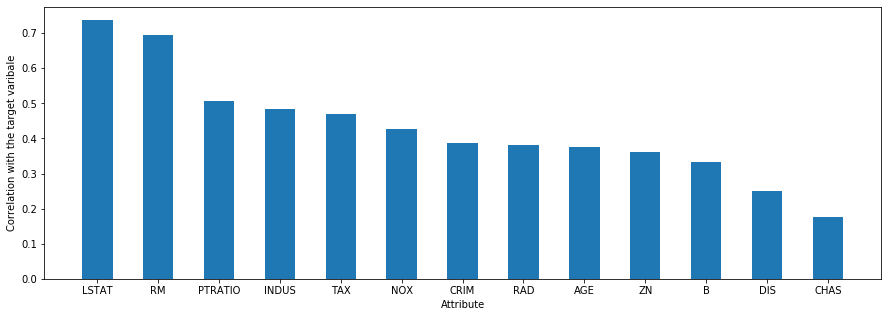

In [12]:
index = np.arange(len(labels))
plt.figure(figsize = (15,5))
plt.bar(index,corr,width = 0.5)
plt.xlabel("Attribute")
plt.ylabel("Correlation with the target varibale")
plt.xticks(index,labels)
plt.show()

### 4. Normalize the data

In [13]:
X = df['LSTAT'].values
Y = df['target'].values
X[:5]

array([4.98, 9.14, 4.03, 2.94, 5.33])

In [14]:
# before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [15]:
X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]
X[:5]

array([0.08967991, 0.2044702 , 0.06346578, 0.03338852, 0.09933775])

In [16]:
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]
Y[:5]

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333])

## 5. Split the dataset

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2)

## 6. Mean Squared Error 

In [18]:
def error(m,x,c,t):
    N = x.size
    e = sum(((m*x+c)-t)**2)
    return e* 1/(2*N)

## 7. Gradient Descent

In [25]:
def update(m,x,c,t,learning_rate) :
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

In [28]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iteration,error_threshold):
    m = init_m
    c = init_c
    error_values = []
    mc_values = []
    
    for i in range(iteration):
        e = error(m,x,c,t)
        if e< error_threshold :
            print("error less than the threshold...stopping gradient descent")
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
           
    return m,c,error_values,mc_values       

In [29]:
%%time
init_m = 0.9
init_c =0
learning_rate = 0.001
error_threshold = 0.001
iteration = 250
m_optimal,c_optimal, error_values,mc_values = gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iteration,error_threshold)

Wall time: 79.2 ms


## 8.Boston Housing Animation

In [34]:
mc_values_anim = mc_values[0:250:5]

MovieWriter matplotlib.animation.PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


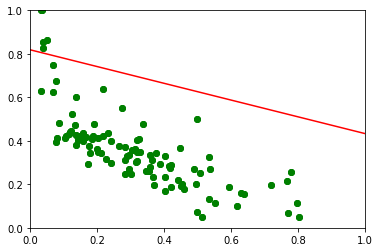

In [69]:
fig, ax = plt.subplots()
ln, = plt.plot([],[],'ro-',animated = True)

def init():
    plt.scatter(xtest,ytest,color ='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

def update_frame(frame) :
    m,c = mc_values_anim[frame]
    x1,y1 = -0.5 ,m * -0.5 +c
    x2,y2 = 1.5 ,m * 0.5+c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim = FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func = init, blit = True)
#anim.save('filename.gif', writer='ffmpeg')
anim.save('LR.gif', writer='matplotlib.animation.PillowWriter')

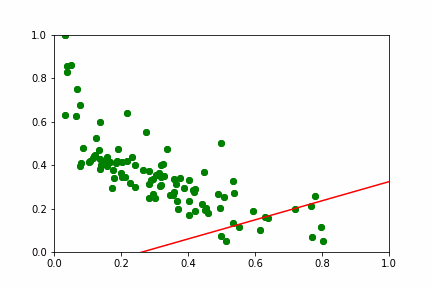

In [65]:
from IPython.display import Image
with open('LR.gif','rb') as file:
    display(Image(file.read()))

## 9.plotting the regression line on training data

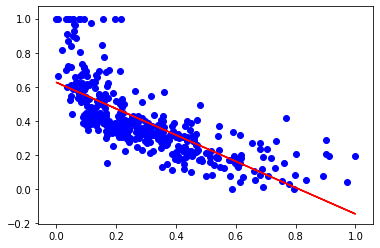

In [72]:
plt.scatter(xtrain,ytrain,color ='b')
plt.plot(xtrain,(m_optimal*xtrain+c_optimal),color ='r')

## 10. plotting error values

Text(0.5, 0, 'iterations')

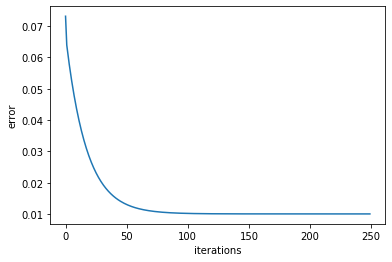

In [73]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('error')
plt.xlabel('iterations')

## 11. Prediction

In [74]:
predicted = (m_optimal * xtest)+c_optimal

In [75]:
mean_squared_error(ytest,predicted)

0.014755821009659102

In [77]:
p = pd.DataFrame(list(zip(xtest,ytest,predicted)),columns = ['X','Ytest','Predicted'])
p.head(2)

,X,Ytest,Predicted
0,0.318433,0.308889,0.380729
1,0.495585,0.202222,0.244212


### plot the predicted values against the test values

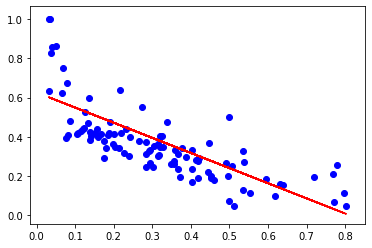

In [79]:
plt.scatter(xtest,ytest,color = 'b')
plt.plot(xtest,predicted,color = 'r')
plt.show()

## 12. Revert Normalization to obtain the predicted price of the house in $1000s

In [88]:
from sklearn.preprocessing import MinMaxScaler
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaler.fit(xtest)
y_scaler.fit(ytest)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p = pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns = ['xtest_scaled','ytest_scaled','predicted_scaled'])
p = p.round(decimals = 2)
p.head(5)

,xtest_scaled,ytest_scaled,predicted_scaled
0,0.28,0.34,0.41
1,0.41,0.24,0.28
2,0.13,0.55,0.55
3,0.42,0.29,0.27
4,0.12,0.46,0.56
